## Eksik Gözlem Analizi
Eksik gözlem analizi, bir veri setinde eksik veya hatalı değerlerin olup olmadığını belirlemek ve bu eksik verileri yönetmek için kullanılan yöntemler bütünüdür. Eksik veriler, istatistiksel analizlerin doğruluğunu etkileyebilir ve yanlış sonuçlara yol açabilir.

Eksik veriler üç farklı şekilde oluşabilir:
- **MCAR (Missing Completely At Random)**: Eksiklik tamamen rastgele oluşur.
- **MAR (Missing At Random)**: Eksiklik, gözlemlenen diğer değişkenlere bağlıdır.
- **MNAR (Missing Not At Random)**: Eksiklik, eksik olan verinin kendisine bağlıdır.

---

## Eksik Veri Hızlı Çözüm
Eksik verileri yönetmek için kullanılan bazı yaygın yöntemler şunlardır:

1. **Eksik Verileri Gözlemleme**
   ```python
   import pandas as pd
   import numpy as np

   df = pd.DataFrame({
       'A': [1, 2, np.nan, 4, 5],
       'B': [np.nan, 2, 3, 4, 5],
       'C': [1, 2, 3, 4, np.nan]
   })
   print(df.isnull().sum())  # Eksik değer sayısı
   ```

2. **Eksik Verileri Silme**
   ```python
   df_clean = df.dropna()  # Eksik verileri içeren satırları siler
   ```

3. **Eksik Verileri Doldurma**
   ```python
   df_filled = df.fillna(df.mean())  # Eksik verileri sütunun ortalamasıyla doldurur
   ```

4. **İleri ve Geri Doldurma**
   ```python
   df_ffill = df.fillna(method='ffill')  # Bir önceki değeri kopyalar
   df_bfill = df.fillna(method='bfill')  # Bir sonraki değeri kopyalar
   ```

---

## Eksik Veri Problemini Giderme Yöntemleri
Eksik verileri yönetmek için farklı yöntemler kullanılabilir:

1. **İstatistiksel Yöntemler**
   - **Ortalama, Medyan veya Mod ile Doldurma**: Sürekli değişkenler için kullanılır.
   - **Regresyon ile Tahmin**: Eksik veriler regresyon modelleriyle tahmin edilebilir.

2. **Makine Öğrenimi Yöntemleri**
   - **K-En Yakın Komşu (KNN) ile Doldurma**: KNN algoritması ile eksik veriler en yakın komşulara göre tahmin edilir.
   - **MICE (Multiple Imputation by Chained Equations)**: Eksik verileri birden fazla iterasyonla tahmin eder.

3. **Tahmine Dayalı Modeller**
   - **Random Forest veya Decision Tree ile Doldurma**: Eksik veriler karar ağaçlarıyla tahmin edilebilir.

---

## Eksik Veri Yapısının Görselleştirilmesi
Eksik verilerin nasıl dağıldığını görmek için bazı görselleştirme yöntemleri kullanılır:

### 1. Eksik Veri Matrisi
```python
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(df)
plt.show()
```

### 2. Eksik Veri Isı Haritası
```python
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()
```

### 3. Eksik Veri Çubuk Grafiği
```python
msno.bar(df)
plt.show()
```

Bu yöntemler, eksik veri yapısını anlamak ve uygun doldurma/silme stratejileri belirlemek için kullanılır. 🔍📊


### Hızlı Çözüm

Eksik değer sayısı:
 V1    2
V2    3
V3    2
dtype: int64

Eksik veriler silindikten sonra:
      V1    V2    V3
2   6.0   5.0   5.0
4   7.0  12.0  14.0
7   9.0   2.0   2.0
8  15.0   3.0  31.0

Eksik veriler sütun ortalaması ile dolduruldu:
      V1         V2    V3
0   1.0   7.000000  11.0
1   3.0   6.166667  12.0
2   6.0   5.000000   5.0
3   6.0   8.000000   6.0
4   7.0  12.000000  14.0
5   1.0   6.166667   7.0
6   6.0   6.166667  11.0
7   9.0   2.000000   2.0
8  15.0   3.000000  31.0

İleri doldurma yöntemiyle doldurulmuş veri:
      V1    V2    V3
0   1.0   7.0   NaN
1   3.0   7.0  12.0
2   6.0   5.0   5.0
3   6.0   8.0   6.0
4   7.0  12.0  14.0
5   1.0  12.0   7.0
6   1.0  12.0   7.0
7   9.0   2.0   2.0
8  15.0   3.0  31.0

Geri doldurma yöntemiyle doldurulmuş veri:
      V1    V2    V3
0   1.0   7.0  12.0
1   3.0   5.0  12.0
2   6.0   5.0   5.0
3   7.0   8.0   6.0
4   7.0  12.0  14.0
5   1.0   2.0   7.0
6   9.0   2.0   2.0
7   9.0   2.0   2.0
8  15.0   3.0  31.0


<Figure size 800x500 with 0 Axes>

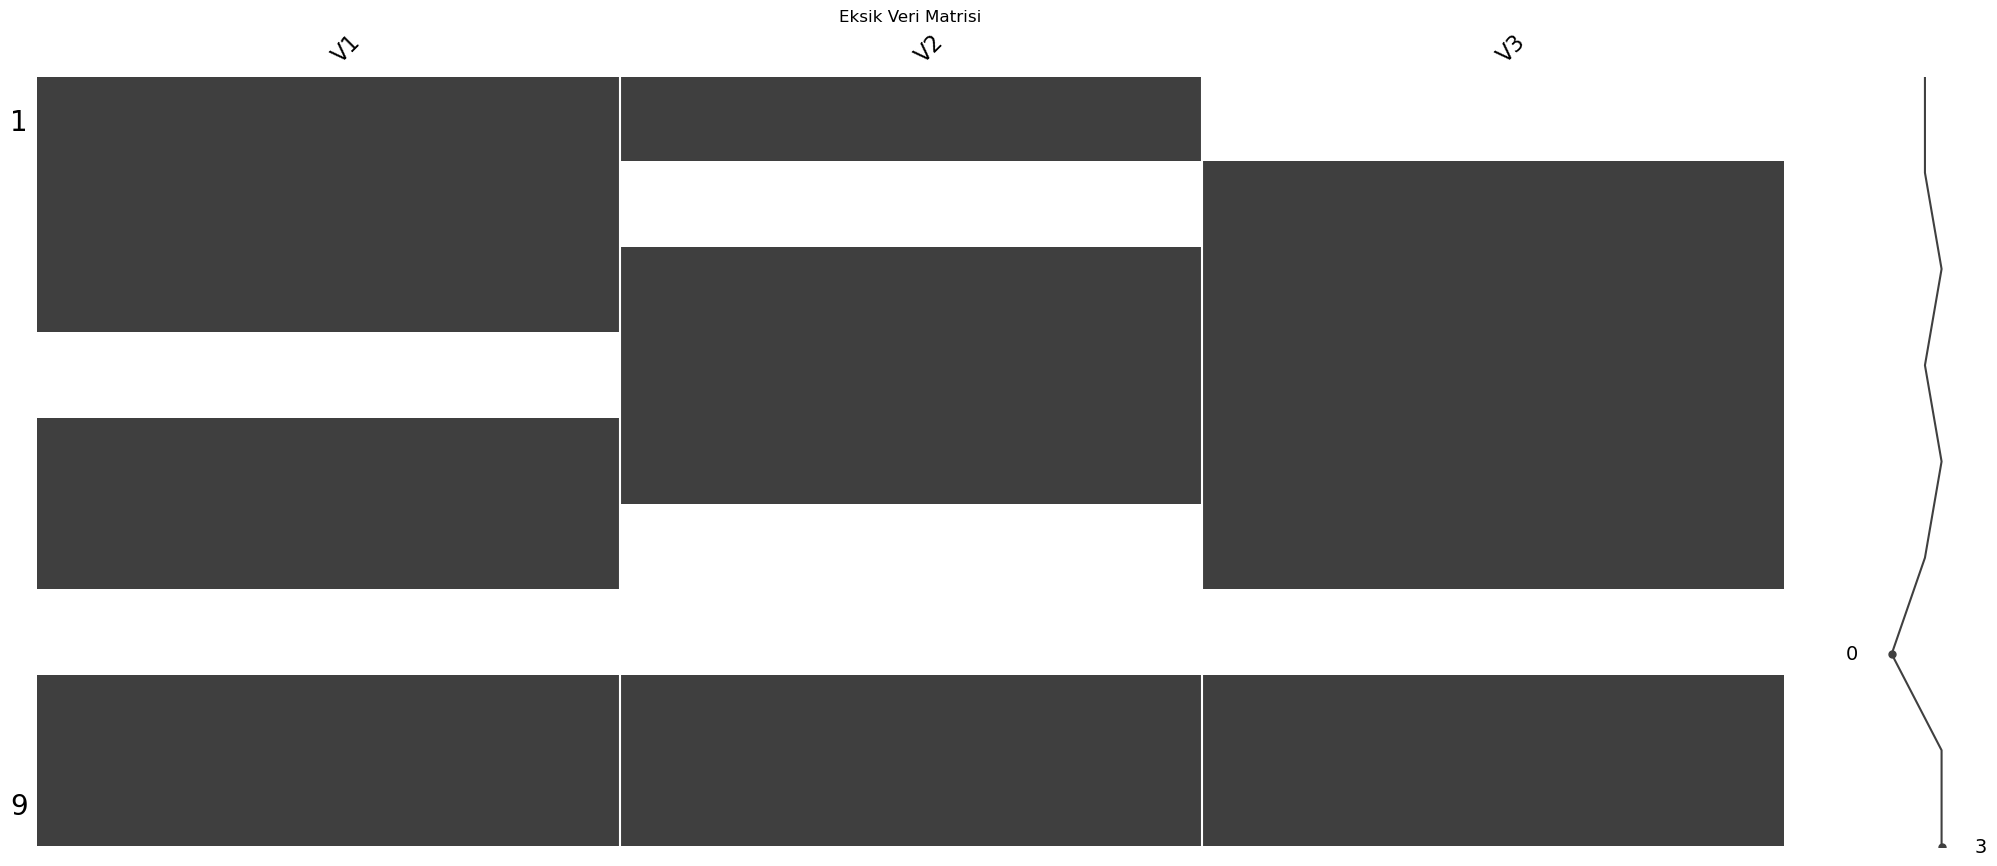

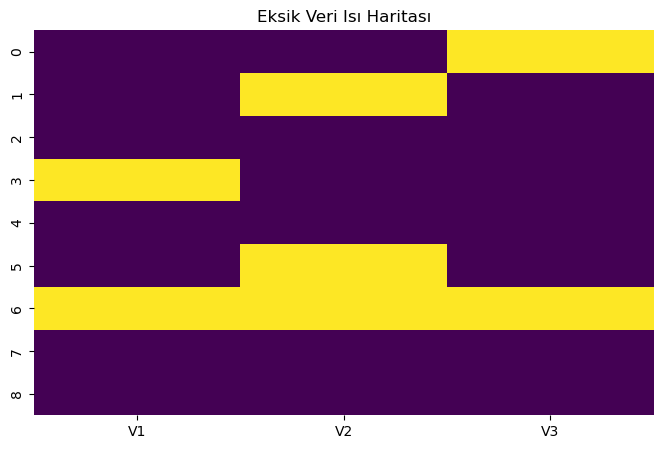

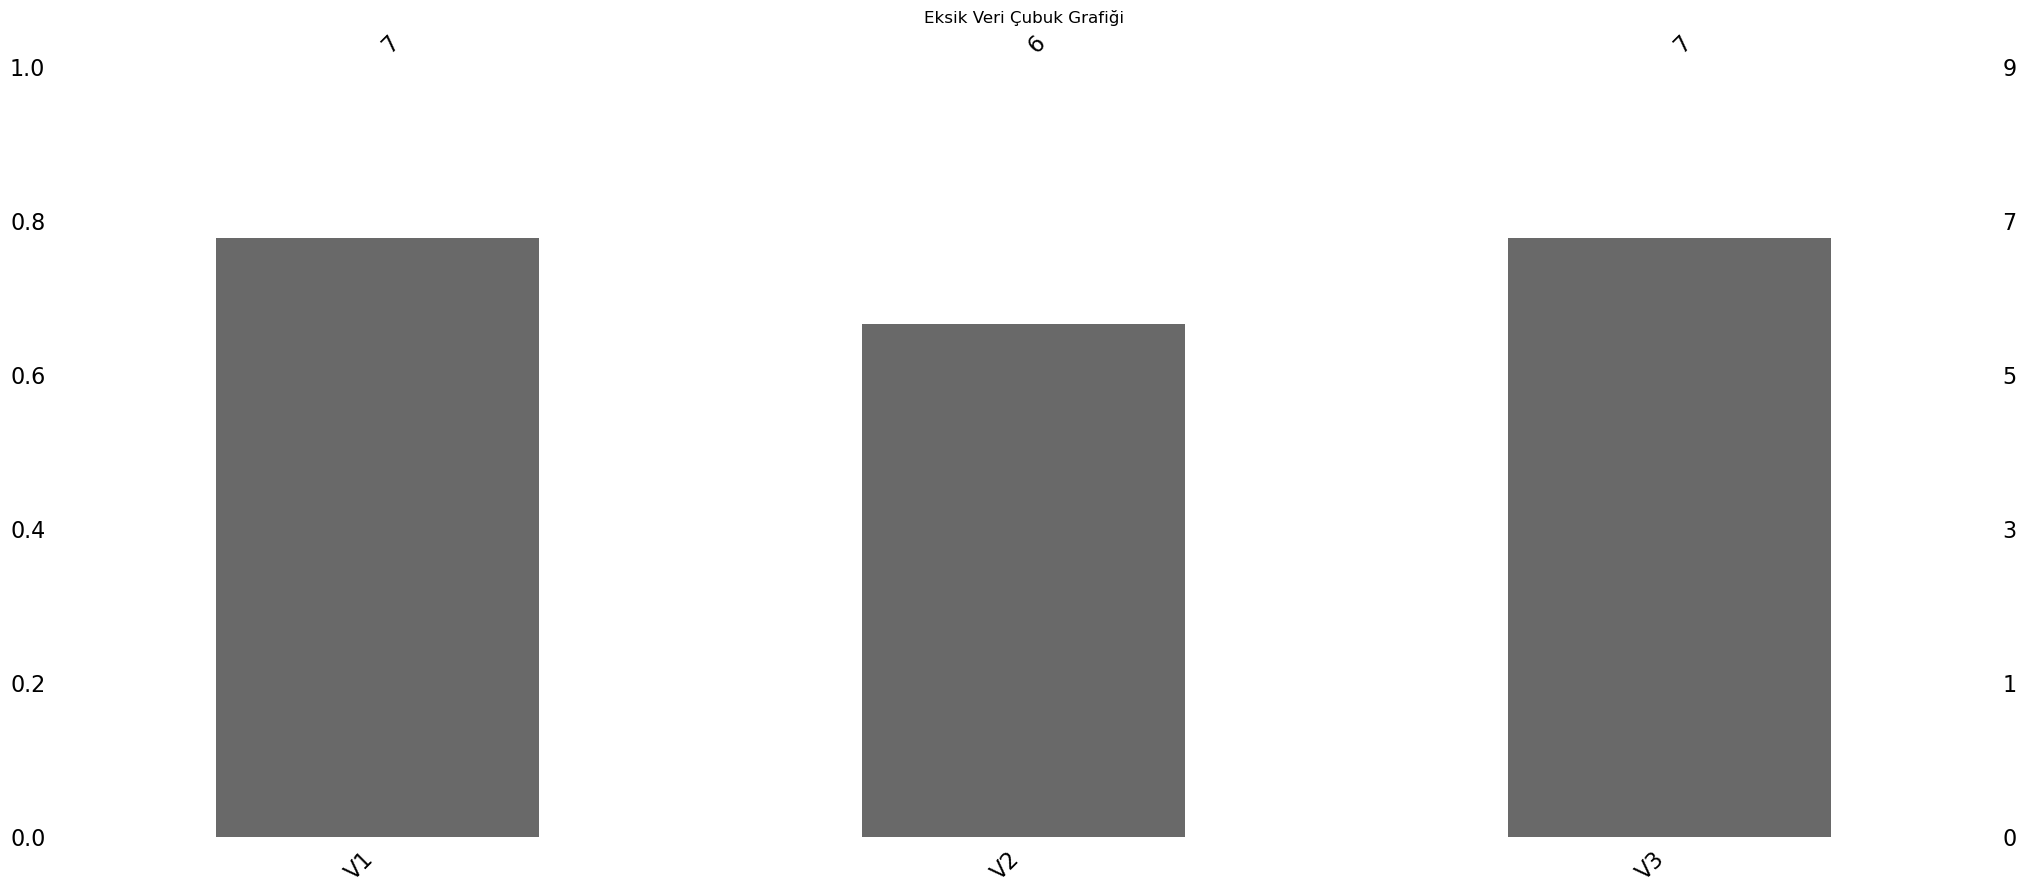

In [19]:
!pip install missingno
import numpy as np
import pandas as pd 
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

# Veri setini oluştur
V1 = np.array([1,3,6,np.nan,7,1,np.nan,9,15])
V2 = np.array([7,np.nan,5,8,12,np.nan,np.nan,2,3])
V3 = np.array([np.nan,12,5,6,14,7,np.nan,2,31])

df = pd.DataFrame(
    {"V1" : V1,
     "V2" : V2,
     "V3" : V3}
)

# 1. Eksik verileri gözlemleme
print("Eksik değer sayısı:\n", df.isnull().sum())

# 2. Eksik verileri içeren satırları silme
df_dropped = df.dropna()
print("\nEksik veriler silindikten sonra:\n", df_dropped)

# 3. Eksik verileri ortalama ile doldurma
df_filled_mean = df.fillna(df.mean())
print("\nEksik veriler sütun ortalaması ile dolduruldu:\n", df_filled_mean)

# 4. İleri doldurma (forward fill)
df_ffill = df.ffill()
print("\nİleri doldurma yöntemiyle doldurulmuş veri:\n", df_ffill)

# 5. Geri doldurma (backward fill)
df_bfill = df.bfill()
print("\nGeri doldurma yöntemiyle doldurulmuş veri:\n", df_bfill)

# -------------------
# EKSİK VERİ GÖRSELLEŞTİRME
# -------------------

# 1. Eksik Veri Matrisi
plt.figure(figsize=(8,5))
msno.matrix(df)
plt.title("Eksik Veri Matrisi")
plt.show()

# 2. Eksik Veri Isı Haritası
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Eksik Veri Isı Haritası")
plt.show()

# 3. Eksik Veri Çubuk Grafiği
plt.figure(figsize=(8,5))
msno.bar(df)
plt.title("Eksik Veri Çubuk Grafiği")
plt.show()



In [20]:
import numpy as np
import pandas as pd 

# Örnek veri seti oluştur
V1 = np.array([1, 3, 6, np.nan, 7, 1, np.nan, 9, 15])
V2 = np.array([7, np.nan, 5, 8, 12, np.nan, np.nan, 2, 3])
V3 = np.array([np.nan, 12, 5, 6, 14, 7, np.nan, 2, 31])

df = pd.DataFrame({"V1": V1, "V2": V2, "V3": V3})
print("Orijinal Veri Seti:\n", df)

# 1. Tüm eksik verileri içeren satırları silme
df_drop_all = df.dropna(how="all")
print("\nTüm değerleri eksik olan satırları sil:\n", df_drop_all)

# 2. En az bir eksik değeri olan satırları silme
df_drop_any = df.dropna(how="any")
print("\nEn az bir eksik verisi olan satırları sil:\n", df_drop_any)

# 3. Belirli bir eşik değerden daha az dolu verisi olan satırları silme
df_thresh = df.dropna(thresh=2)  # En az 2 dolu değer olmalı, yoksa silinir
print("\nEn az 2 dolu hücreye sahip satırları tut:\n", df_thresh)

# 4. Eksik veri içeren sütunları silme
df_drop_columns = df.dropna(axis=1)
print("\nEksik verisi olan sütunları sil:\n", df_drop_columns)


Orijinal Veri Seti:
      V1    V2    V3
0   1.0   7.0   NaN
1   3.0   NaN  12.0
2   6.0   5.0   5.0
3   NaN   8.0   6.0
4   7.0  12.0  14.0
5   1.0   NaN   7.0
6   NaN   NaN   NaN
7   9.0   2.0   2.0
8  15.0   3.0  31.0

Tüm değerleri eksik olan satırları sil:
      V1    V2    V3
0   1.0   7.0   NaN
1   3.0   NaN  12.0
2   6.0   5.0   5.0
3   NaN   8.0   6.0
4   7.0  12.0  14.0
5   1.0   NaN   7.0
7   9.0   2.0   2.0
8  15.0   3.0  31.0

En az bir eksik verisi olan satırları sil:
      V1    V2    V3
2   6.0   5.0   5.0
4   7.0  12.0  14.0
7   9.0   2.0   2.0
8  15.0   3.0  31.0

En az 2 dolu hücreye sahip satırları tut:
      V1    V2    V3
0   1.0   7.0   NaN
1   3.0   NaN  12.0
2   6.0   5.0   5.0
3   NaN   8.0   6.0
4   7.0  12.0  14.0
5   1.0   NaN   7.0
7   9.0   2.0   2.0
8  15.0   3.0  31.0

Eksik verisi olan sütunları sil:
 Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8]


### Basit Değer Atama Yöntemi (Simple Imputation) 
eksik verilere sahip bir veri setinde, eksik olan verilerin bir sabit değerle (genellikle ortalama, medyan veya en yaygın değer gibi) doldurulması işlemidir. Bu yöntem, eksik verilerle çalışırken oldukça yaygın olup, verilerin kaybını azaltmaya yardımcı olabilir. Ancak, bazı durumlarda modelin doğruluğunu olumsuz etkileyebilir.

Örnek:

* Ortalama ile Doldurma: Sayısal verilerde eksik veriler, o sütunun ortalama değeri ile doldurulabilir.
* Mod ile Doldurma: Kategorik verilerde eksik değerler, o sütunun en yaygın (mod) değeri ile doldurulabilir.

In [25]:
import numpy as np
import pandas as pd 


# Veri setini oluştur
V1 = np.array([1,3,6,np.nan,7,1,np.nan,9,15])
V2 = np.array([7,np.nan,5,8,12,np.nan,np.nan,2,3])
V3 = np.array([np.nan,12,5,6,14,7,np.nan,2,31])

df = pd.DataFrame(
    {"V1" : V1,
     "V2" : V2,
     "V3" : V3}
)
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [ ]:
# Sayısal değişkenlerde atama
df["V1"].fillna(0) # 0 ile doldur

0     1.0
1     3.0
2     6.0
3     0.0
4     7.0
5     1.0
6     0.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [27]:
df["V2"].fillna(df["V2"].mean()) # Ortalama ile doldur

0     7.000000
1     6.166667
2     5.000000
3     8.000000
4    12.000000
5     6.166667
6     6.166667
7     2.000000
8     3.000000
Name: V2, dtype: float64

In [ ]:
#Tüm değişkenler için 1. yol
df.apply(lambda x: x.fillna(x.mean()), axis=0) # Tüm değişkenler için ortalama ile doldur

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [30]:
# Tüm değikenler için 2. yol
df.fillna(df.mean()[:]) # Tüm değişkenler için ortalama ile doldur

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [31]:
df.fillna(df.mean()["V1":"V2"]) # Belirli değişkenler için ortalama ile doldur

,V1,V2,V3
0,1.0,7.000000,NaN
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,NaN
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [32]:
df["V3"].fillna(df["V3"].median()) # Medyan ile doldur

0     7.0
1    12.0
2     5.0
3     6.0
4    14.0
5     7.0
6     7.0
7     2.0
8    31.0
Name: V3, dtype: float64

In [33]:
# Tüm değişkenler için 3. yol
df.where(pd.notna(df), df.mean(), axis="columns") # Tüm değişkenler için ortalama ile doldur

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [34]:
#Kategorik Değişken Kırılımında Değer Atama
V1 = np.array([1,3,6,np.nan,7,1,np.nan,9,15])
V2 = np.array([7,np.nan,5,8,12,np.nan,np.nan,2,3])
V3 = np.array([np.nan,12,5,6,14,7,np.nan,2,31])
V4 = np.array(["IT","IT","IK","IK","IK","IK","IK","IT","IT"])

df = pd.DataFrame(
    {"maas" : V1,
     "V2" : V2,
     "V3" : V3,
     "departman" : V4}
)
df


,maas,V2,V3,departman
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IT
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [35]:
df.groupby("departman")["maas"].mean()

departman
IK    4.666667
IT    7.000000
Name: maas, dtype: float64

In [37]:
df["maas"].fillna(df.groupby("departman")["maas"].transform("mean")) # Grup ortalaması ile doldur

0     1.000000
1     3.000000
2     6.000000
3     4.666667
4     7.000000
5     1.000000
6     4.666667
7     9.000000
8    15.000000
Name: maas, dtype: float64

In [38]:
# Kategorik Değişkenler için değer atama

V1 = np.array([1,3,6,np.nan,7,1,np.nan,9,15])
V4 = np.array(["IT",np.nan,"IK","IK","IK","IK","IK","IT","IT"], dtype=object)

df = pd.DataFrame(
    {"maas" : V1,
     "departman" : V4}
)
df

,maas,departman
0,1.0,IT
1,3.0,NaN
2,6.0,IK
3,NaN,IK
4,7.0,IK
5,1.0,IK
6,NaN,IK
7,9.0,IT
8,15.0,IT


In [39]:
df["departman"].fillna(df["departman"].mode()[0]) # En sık tekrar eden ile doldur

0    IT
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

In [40]:
df["departman"].fillna(method = "ffill") # Önceki değer ile doldur

C:\Users\Kutay\AppData\Local\Temp\ipykernel_32748\3799635372.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["departman"].fillna(method = "ffill") # Önceki değer ile doldur


0    IT
1    IT
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

In [43]:
df.fillna(df.mean()[:])

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.000000,1,0,7.2500
1,1,1,38.000000,1,0,71.2833
2,1,3,26.000000,0,0,7.9250
3,1,1,35.000000,1,0,53.1000
4,0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000
887,1,1,19.000000,0,0,30.0000
888,0,3,29.699118,1,2,23.4500
889,1,1,26.000000,0,0,30.0000


In [44]:
# Tahmine Dayalı Değer Atama Yöntemleri (Makine Öğrenmesi)

import seaborn as sns
import missingno as msno
df = sns.load_dataset("titanic")
df = df.select_dtypes(include = ['float64', 'int64'])
print(df.head())
print(df.isnull().sum())

   survived  pclass   age  sibsp  parch     fare
0         0       3  22.0      1      0   7.2500
1         1       1  38.0      1      0  71.2833
2         1       3  26.0      0      0   7.9250
3         1       1  35.0      1      0  53.1000
4         0       3  35.0      0      0   8.0500
survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64


In [46]:
!pip install ycimpute

In [ ]:
# KNN Algoritması
import numpy as np
from ycimpute.imputer import knnimput # knn algoritması ile doldurma
var_names = list(df)
n_df = np.array(df)
print(n_df[0:10])
print("\n")
print(n_df.shape)

[[ 0.      3.     22.      1.      0.      7.25  ]
 [ 1.      1.     38.      1.      0.     71.2833]
 [ 1.      3.     26.      0.      0.      7.925 ]
 [ 1.      1.     35.      1.      0.     53.1   ]
 [ 0.      3.     35.      0.      0.      8.05  ]
 [ 0.      3.         nan  0.      0.      8.4583]
 [ 0.      1.     54.      0.      0.     51.8625]
 [ 0.      3.      2.      3.      1.     21.075 ]
 [ 1.      3.     27.      0.      2.     11.1333]
 [ 1.      2.     14.      1.      0.     30.0708]]


(891, 6)


In [50]:
dff = knnimput.KNN(k = 4).complete(n_df) # k = 4 komşu seç


Imputing row 1/891 with 0 missing, elapsed time: 0.089
Imputing row 101/891 with 0 missing, elapsed time: 0.091
Imputing row 201/891 with 0 missing, elapsed time: 0.092
Imputing row 301/891 with 1 missing, elapsed time: 0.092
Imputing row 401/891 with 0 missing, elapsed time: 0.092
Imputing row 501/891 with 0 missing, elapsed time: 0.093
Imputing row 601/891 with 0 missing, elapsed time: 0.094
Imputing row 701/891 with 0 missing, elapsed time: 0.094
Imputing row 801/891 with 0 missing, elapsed time: 0.094


In [52]:
type(dff)

numpy.ndarray

In [54]:
dff = pd.DataFrame(dff, columns = var_names)
type(dff)

pandas.core.frame.DataFrame

In [55]:
dff.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

In [56]:
# Random Forests Algoritması

import seaborn as sns
import missingno as msno
df = sns.load_dataset("titanic")
df = df.select_dtypes(include = ['float64', 'int64'])
print(df.head())
print(df.isnull().sum())

   survived  pclass   age  sibsp  parch     fare
0         0       3  22.0      1      0   7.2500
1         1       1  38.0      1      0  71.2833
2         1       3  26.0      0      0   7.9250
3         1       1  35.0      1      0  53.1000
4         0       3  35.0      0      0   8.0500
survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64


In [57]:
var_names = list(df)
n_df = np.array(df)


In [75]:
from sklearn.impute import SimpleImputer
n_dff = SimpleImputer(missing_values=np.nan, strategy="mean").fit(n_df).transform(n_df)
dff = pd.DataFrame(dff, columns = var_names)
df.isnull().sum()

survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [76]:
# EM Algoritması
import seaborn as sns
import missingno as msno
df = sns.load_dataset("titanic")
df = df.select_dtypes(include = ['float64', 'int64'])

In [77]:
from ycimpute.imputer import EM
var_names = list(df)
n_df = np.array(df)
dff = EM().complete(n_df)
dff = pd.DataFrame(dff, columns = var_names)
dff.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64